<a href="https://colab.research.google.com/github/Manmeetkaur17/Hex_KaggleDataset/blob/main/Hex_TitanicDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
traindf=pd.read_csv('/content/train.csv')

Understanding the dataset(EDA)

In [5]:
print(traindf.shape)

(891, 12)


In [6]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(traindf.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
traindf.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [9]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(traindf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
traindf.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


PREPERATION (Cleaning the dataset and removing the null values)

In [12]:
traindf['Age'].fillna(traindf['Age'].mean(), inplace=True)
traindf['Embarked'].fillna('C')
traindf.drop(['Cabin'], axis=1, inplace=True)




In [13]:
traindf.reset_index(drop=True, inplace=True)

In [14]:
traindf['age_group'] = pd.cut(traindf['Age'],
                         bins=[0, 12, 19, 34, 54, float('inf')],
                         labels=['Children', 'Teenagers', 'Young Adults', 'Adults', 'Seniors'])

In [15]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_group'],
      dtype='object')

In [16]:
age_group=traindf.groupby('Age')['Survived']

#Label encoding the categorical values of age group
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
traindf['age_group']=le.fit_transform(traindf['age_group'])

In [17]:

encode=LabelEncoder()
traindf['Sex']=encode.fit_transform(traindf['Sex'])
traindf['Pclass']=encode.fit_transform(traindf['Pclass'])
traindf['Embarked']=encode.fit_transform(traindf['Embarked'])

In [18]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,4
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,4
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0


## Feature Understanding

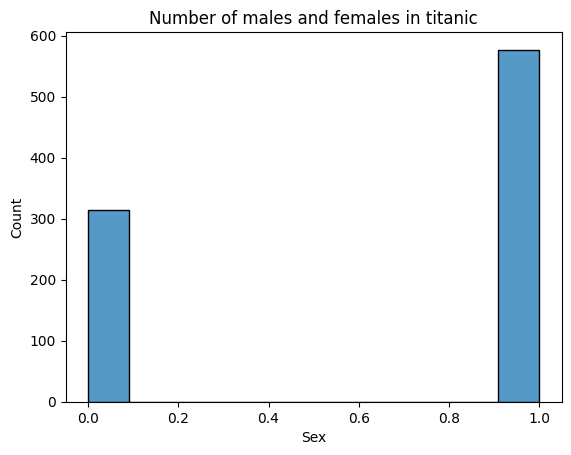

In [19]:
hist=sns.histplot(traindf['Sex'])
plt.xlabel("Sex")
plt.ylabel("Count")
hist.set_title("Number of males and females in titanic")
plt.show()


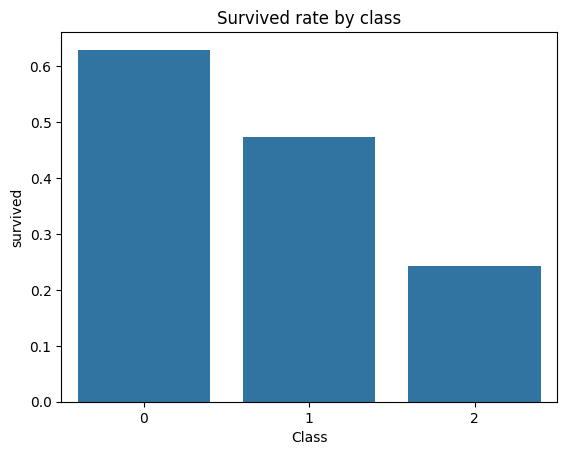

In [20]:
sns.barplot(x='Pclass',y='Survived', data=traindf, errorbar=None)
plt.xlabel("Class")
plt.ylabel("survived")
plt.title("Survived rate by class")
plt.show()

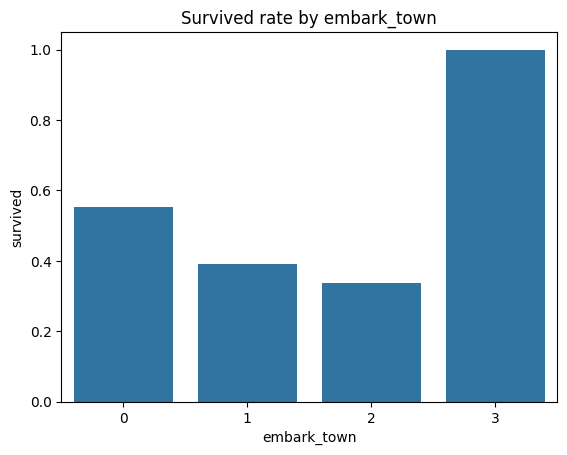

In [21]:
sns.barplot(x='Embarked',y='Survived', data=traindf, errorbar=None)
plt.xlabel("embark_town")
plt.ylabel("survived")
plt.title("Survived rate by embark_town")
plt.show()


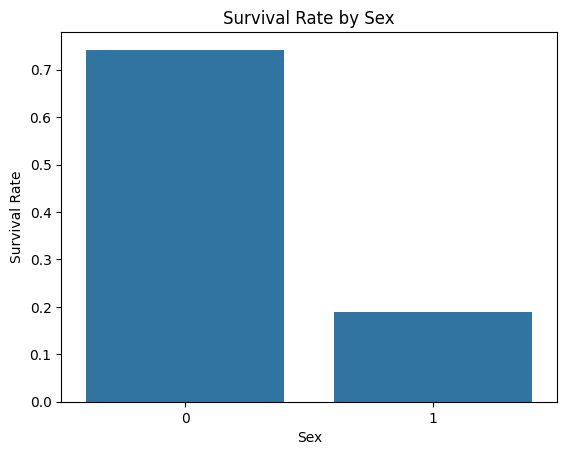

In [22]:
sns.barplot(x='Sex', y='Survived', data=traindf, ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

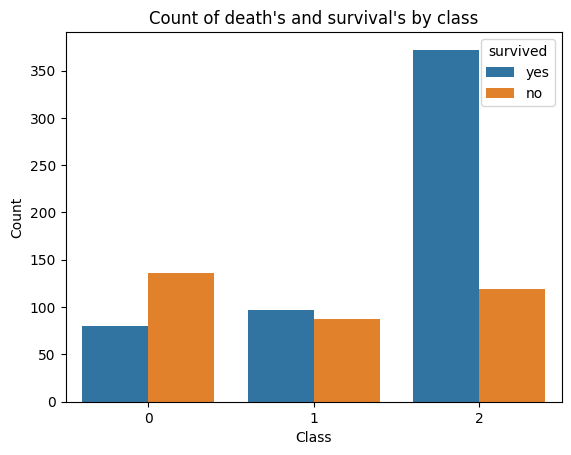

In [23]:
#countplot will count the Number of Death's and Survivor's by class
sns.countplot(x='Pclass', hue='Survived', data=traindf)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of death's and survival's by class")
plt.legend(title='survived', labels=['yes','no'])
plt.show()

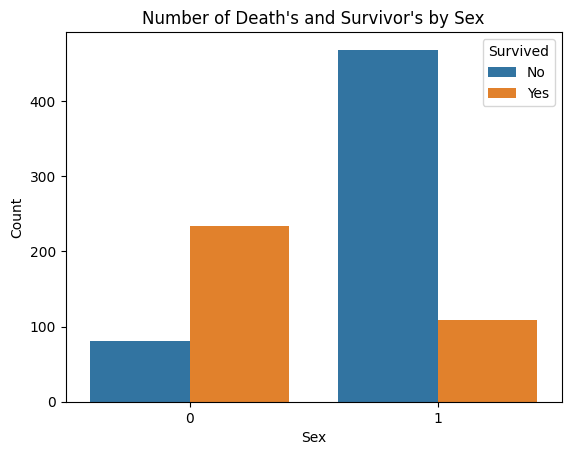

In [24]:
#countplot will count the Number of Death's and Survivor's by Sex
sns.countplot(x='Sex', hue='Survived', data=traindf)
plt.title("Number of Death's and Survivor's by Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

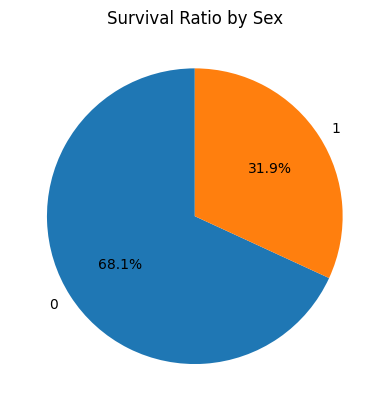

In [25]:
#Pie chart shows the portion of survival ratio of male and females
survived_sex=traindf.groupby('Sex')['Survived'].sum()
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Ratio by Sex')
plt.show()


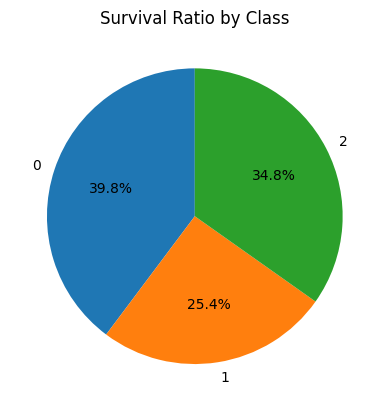

In [26]:
#Pie chart shows the portion of survival by class
survived_class=traindf.groupby('Pclass')['Survived'].sum()
plt.pie(survived_class,labels=survived_class.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Ratio by Class')
plt.show()


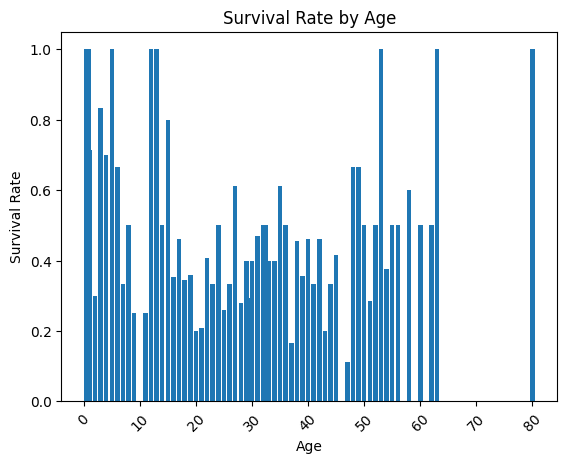

In [27]:
#survival by age
#survival by age
age_group = traindf.groupby('Age')['Survived'].mean() # Calculate the mean survival rate for each age group

plt.bar(age_group.index, age_group.values)
plt.xticks(rotation=45)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()


---
# **`Training the Model`**
---

In [28]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [29]:
#split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X=traindf[features]
y=traindf[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [30]:
#normalizing the numerical features
from sklearn.preprocessing import StandardScaler

numerical_features =['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
scaler=StandardScaler()

# Fit and transform only on the numerical features of the training data
X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])
# Transform the numerical features of the test data
X_test[numerical_features]=scaler.transform(X_test[numerical_features])

# Neural Networks

In [31]:
#neural networks
import tensorflow as tf

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Convert target variables to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train.shape)
print(y_test.shape)

(712, 2)
(179, 2)


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,426 (44.63 KB)

 Trainable params: 11,426 (44.63 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy()
    ]
    )

In [36]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',min_delta=0,patience=10,verbose=1,
    mode='auto',restore_best_weights=True    #reassign the best weight in epoches
)
history=model.fit(X_train, y_train, batch_size=512,epochs=10_000,verbose=1,validation_data=(X_test, y_test), validation_split=0.0,  callbacks=[early_stopping])


Epoch 1/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - categorical_accuracy: 0.5398 - loss: 0.6992 - val_categorical_accuracy: 0.6369 - val_loss: 0.6713
Epoch 2/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.6218 - loss: 0.6610 - val_categorical_accuracy: 0.6983 - val_loss: 0.6399
Epoch 3/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.6697 - loss: 0.6454 - val_categorical_accuracy: 0.7374 - val_loss: 0.6105
Epoch 4/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7105 - loss: 0.6083 - val_categorical_accuracy: 0.7654 - val_loss: 0.5828
Epoch 5/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.7330 - loss: 0.5843 - val_categorical_accuracy: 0.7765 - val_loss: 0.5575
Epoch 6/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.7392 - loss: 0.5687 - val_categorical_accuracy: 0.7765 - val_loss: 0.5347
Epoch 7/10000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.7655 - lo

In [37]:
import pandas as pd
history_df=pd.DataFrame(history.history)
history_df

,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0.542135,0.698620,0.636872,0.671343
1,0.622191,0.660846,0.698324,0.639900
2,0.668539,0.645084,0.737430,0.610467
3,0.709270,0.609144,0.765363,0.582820
4,0.730337,0.585881,0.776536,0.557519
5,0.741573,0.566416,0.776536,0.534690
6,0.765449,0.541307,0.776536,0.513751
7,0.769663,0.522856,0.770950,0.495285
8,0.773876,0.506101,0.787709,0.478376
9,0.775281,0.498316,0.793296,0.463775


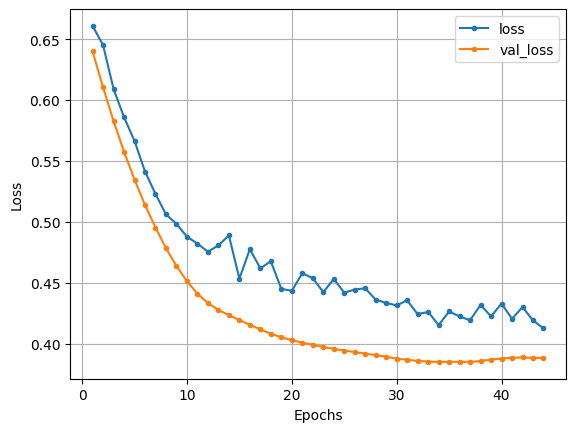

In [38]:
import matplotlib.pyplot as plt
history_df[['loss','val_loss']].iloc[1:].plot(marker='.')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()